In [4]:
from rdf_scripts import *

### Step 1 - Create test cluster to find out metal (M) - oxygen (O) bond length

In [5]:
# The get_test_cluster function is used to first create a cluster_test.xyz large quantum cluster to find the M-O bond length
# There are two options for generating this test cluster and we will illustrate these options with two examples: TiO2 bulk and MgO surface

# The simplest option is to use a .pun file created by ChemShell, see:
# https://www.chemshell.org/sites/www.chemshell.org/files/docs/py-chemshell/tutorial/build/html/index.html
# Example of TiO2 bulk
get_test_cluster('tio2_shells_cluster.pun',M_element='Ti',fmt='pun',pbc=False)          

# Otherwise, we can use a file format supported by ASE: https://wiki.fysik.dtu.dk/ase/ase/io/io.html
# This supports using a repeating unit cell by setting pbc=True with a corresponding supercell size given by supercell=
# If 2D material, supercell must have 1 along the third column, assuming vacuum is in the z direction.
# Example of MgO surface
get_test_cluster('mgo.poscar','cluster_test_MgO.xyz',M_element='Mg',fmt='vasp',pbc=True,supercell=[5,5,1])          

### Step 2 - Generate clusters with the SKZCAM approach

YOU HAVE BEEN SKZCAMMED


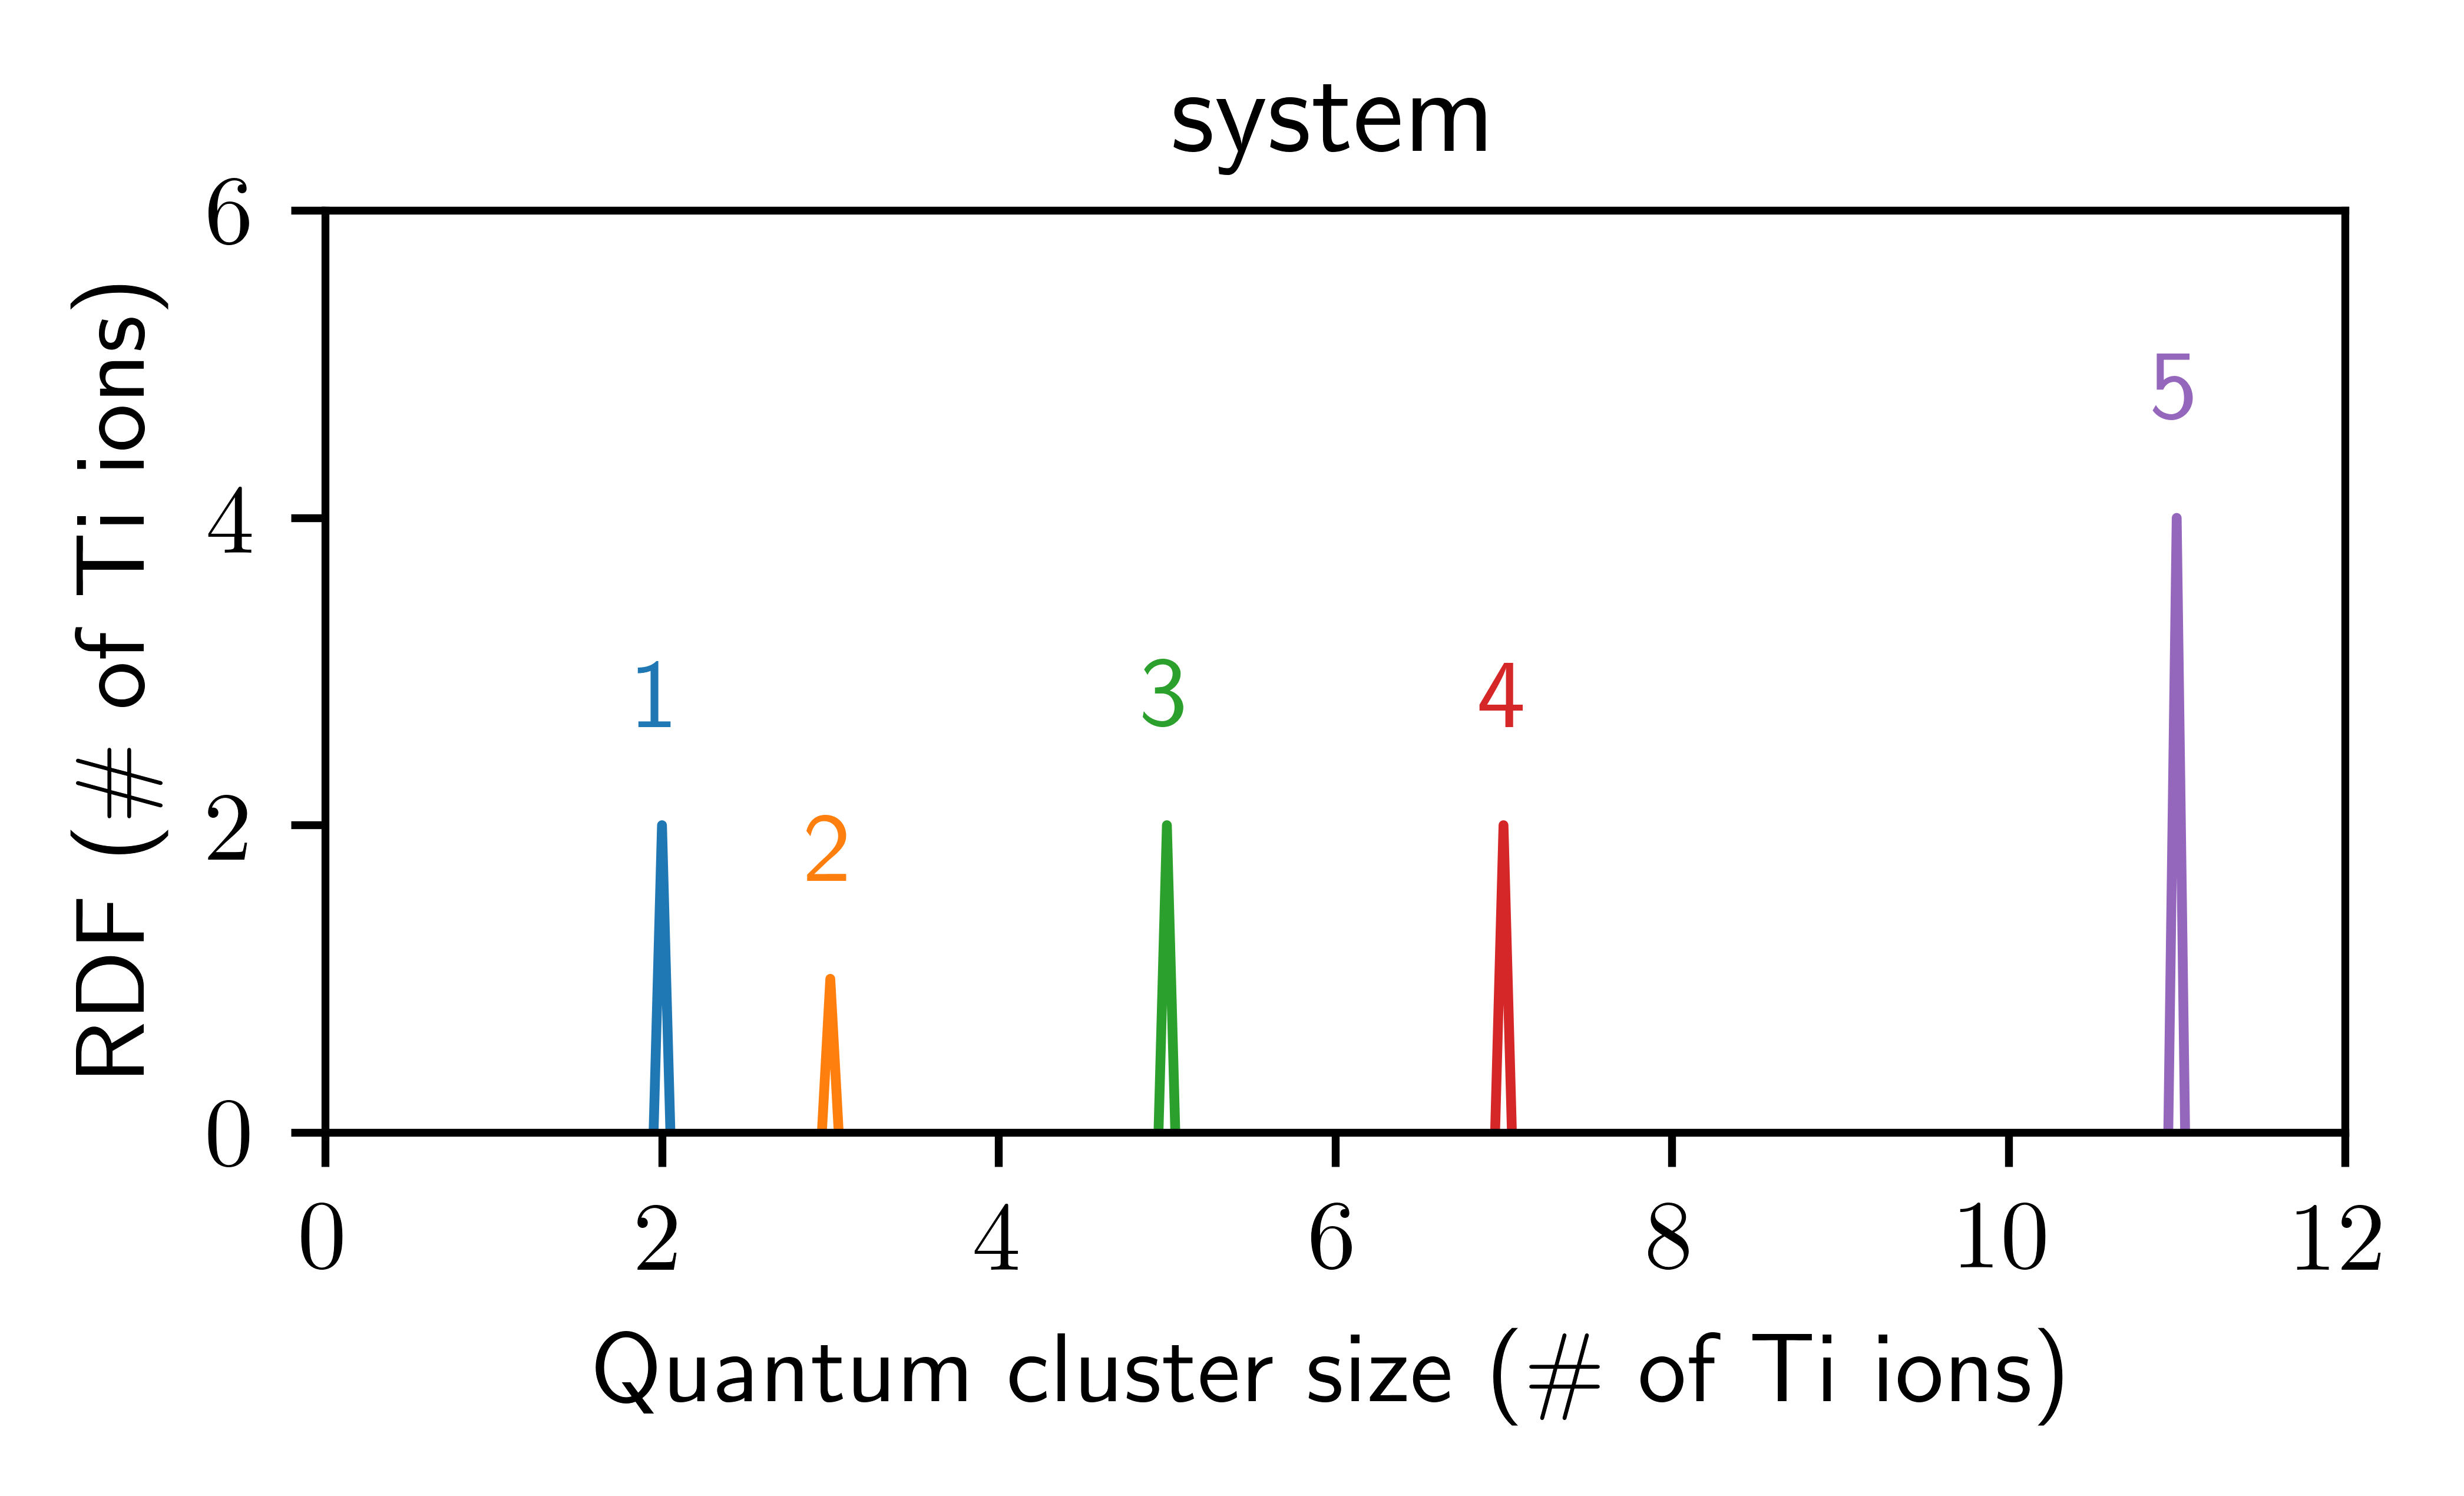

YOU HAVE BEEN SKZCAMMED


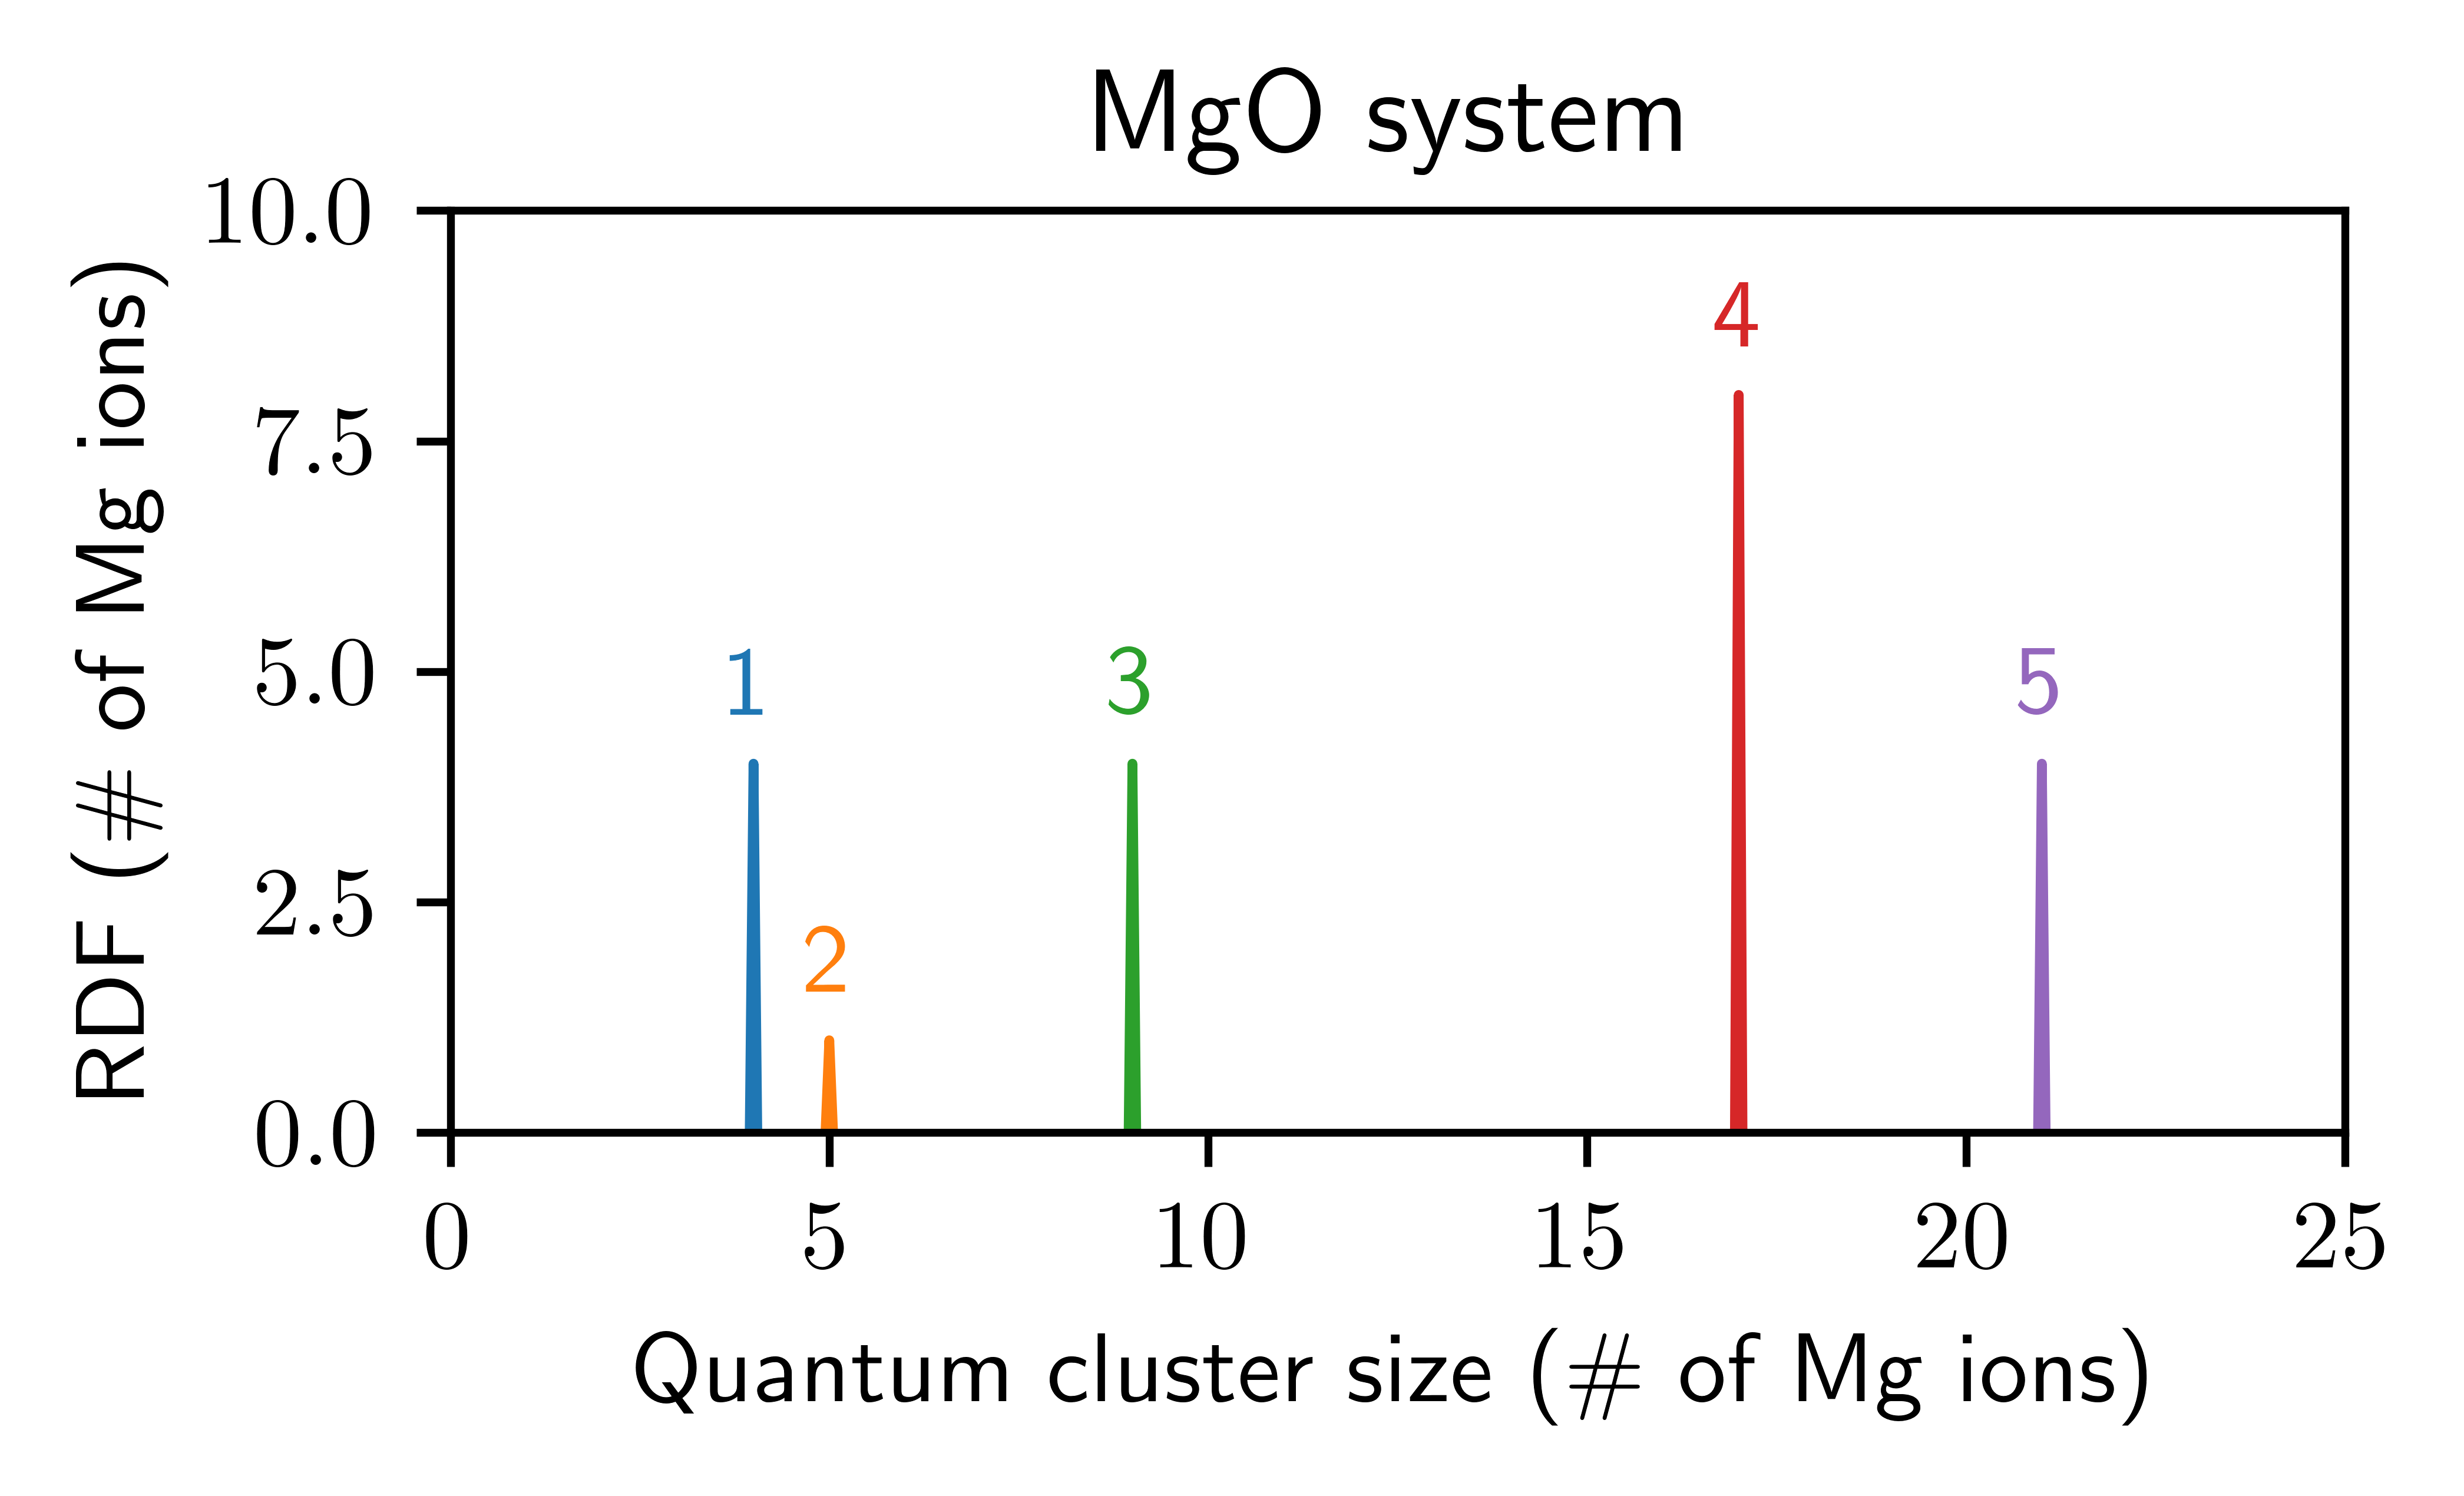

In [6]:
# With the test cluster created, we can use this to generate clusters of increasing with the SKZCAM approach
# As part of this, you will need to find the index of the central atom about which to expand the RDF from (e.g. surface O for an O vacancy)
# The .xyz files of the resulting RDF clusters will be saved under the Structures/ folder with the general format cluster_x_rdf_y.xyz
# where x can be controlled by the output_filename_append input and y gives the cluster size in terms of number of RDF shells.
# The number of clusters to generate (starting from the smallest with 1 RDF shell) can be controlled by the num_rdf_clusters input.

# For TiO2 bulk
get_rdf_cluster(filename='cluster_test.xyz',centre_index=0,MO_dist=1.98,M_element='Ti',num_rdf_clusters=5)


# For MgO surface
get_rdf_cluster(filename='cluster_test_MgO.xyz',output_filename_append='MgO',centre_index=3087,MO_dist=2.10,M_element='Mg',num_rdf_clusters=5)

# The atomic indices used to generate these clusters are also saved in cluster_x_rdf_indices.npy if it needs to be loaded in other programs such as py-ChemShell
 

### (Optional) Step 3 - Visualize clusters created by SKZCAM approach

In [12]:
# You can pick which files to view by just modifying the filename in the line below
dummy1 = io.read('Structures/cluster__rdf_5.xyz')
view(dummy1, viewer='x3d')